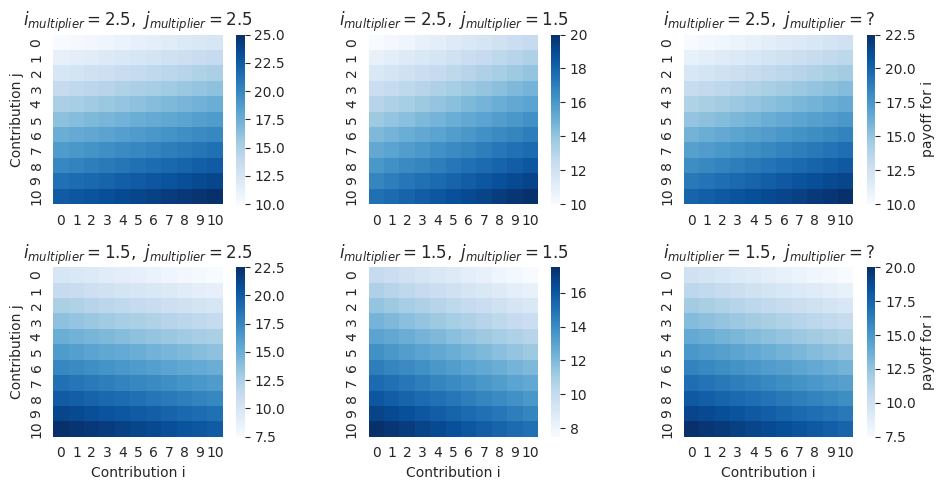

In [32]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
plt.rcParams['svg.fonttype'] = 'none'


def heatmap(good=2.5, bad=1.5, unknown=2):
    good = 2.5
    bad = 1.5

    vmin = 7.5
    vmax = 25

    labelx = 'Contribution i'
    labely = 'Contribution j'
    cbar_kw = {'label': 'payoff for i'}
    # creating a colormap
    colormap = plt.get_cmap("Blues")
    count = 0

    for t1, t2 in ((good, good), (good, bad), (good, unknown),
            (bad, good), (bad, bad), (bad, unknown)):

        count += 1
        plt.subplot(2, 3, count)

        t1_label = t1
        t2_label = t2

        if (t2 == 2): t2_label = '?'

        title = '$i_{multiplier}=' + str(t1_label) + ',\ j_{multiplier}=' + str(t2_label) + '$'
        data = np.zeros((11, 11))
        for i in range(11):
            for j in range(11):
                data[j, i] = 10 - i + ((i*t1 + j*t2)/2)
        
        max_ = data.flatten().max()
        min_ = data.flatten().min()

        # if max_ is round number, transform it to int
        max_ = int(max_) if max_ == int(max_)  else max_
        # same for min_
        min_ = int(min_) if min_ == int(min_) else min_

        to_display = data.copy().astype('str')
        to_display[(data != max_) & (data != min_)] = ''
        to_display[(data == max_)] = str(max_)
        to_display[(data == min_)] = str(min_)
        
        sns.heatmap(data, cbar_kws=cbar_kw if count in (3, 6) else {'label': ''},cmap=colormap,  square=True)  #annot=to_display, fmt='', 
        if count > 3:
            plt.xlabel(labelx)
        if count in (1, 4):
            plt.ylabel(labely)
        plt.title(title)
        # plt.show()

sns.set({'figure.figsize': (10, 5)})

heatmap()
plt.tight_layout()
plt.savefig('fig/heatmap.svg')
# data = np.array([[0.000000,0.000000],[-0.231049,0.000000],[-0.231049,0.000000]])
# labels =  np.array([['A','B'],['C','D'],['E','F']])
# fig, ax = plt.subplots()
# ax = sns.heatmap(data, annot = labels, fmt = '')
